<a href="https://colab.research.google.com/github/JeonJunWooo/mini_project/blob/main/3%EC%B0%A8_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%88%EB%9F%AC%EC%98%A4%EA%B8%B0%2Ccrop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 안녕하세요^^ 
# AIVLE 미니 프로젝트에 오신 여러분을 환영합니다.
* 본 과정에서는 실제 사례와 데이터를 기반으로 문제를 해결하는 전체 과정을 자기 주도형 실습으로 진행해볼 예정입니다.
* 앞선 교육과정을 정리하는 마음과 지금까지 배운 내용을 바탕으로 문제 해결을 해볼게요!
* 미니 프로젝트를 통한 문제 해결 과정 'A에서 Z까지', 지금부터 시작합니다!

---

## 0. 환경 설정하기

### 1) 구글 드라이브 연결하기

In [ ]:
# 코랩 사용 시 구글 드라이브 연결
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### 2) 경로 확인하기
- "WORK_SPACE" 에 본인 작업 경로 작성 후 실행(구글 드라이브 최상위에 압축해제 시 그대로 실행. 수정 X).<br>

<font color="red">※ 주의. 나머지 경로는 절대 변경하지 마세요.</font>

In [ ]:
# ROOT_PATH 확인 
import os

# 구글 드라이브 내 프로젝트 압축해제된 영역 (구글 드라이브 최상위에 압축해제하였을 경우 수정하지 않으셔도 됩니다.)
WORK_SPACE = ""

if os.getcwd() == '/content' :
  # 구글 드라이브 사용 시 
  ROOT_PATH = "/content/drive/MyDrive/"+WORK_SPACE+"/AIVLE3rd_individual"
else :
  ROOT_PATH = os.path.abspath('..')

# 영상 파일 경로
VIDEO_PATH = ROOT_PATH + "/video"
# 영상을 분할한 이미지 경로
IMAGE_PATH = ROOT_PATH + "/image"


### 3) 비디오 데이터 다운로드하기
아래 코드를 실행하세요.

In [ ]:
# test data 다운로드
!pip install gdown

import gdown
import shutil
import zipfile
 
google_path = 'https://drive.google.com/uc?id='
file_id = '....'
output_name = 'video.zip'

# 파일 다운로드
gdown.download(google_path+file_id,output_name,quiet=False)

# 파일 위치 이동
shutil.move("./" + output_name, ROOT_PATH)

zip_file = ROOT_PATH + "/" + output_name

# 압축해제 
with zipfile.ZipFile(zip_file) as z:
    z.extractall(ROOT_PATH)

os.remove(zip_file)

### 4) 라이브러리 불러오기
필요시 추가 라이브러리는 설치해서 사용하세요.

In [ ]:
# 필요 라이브러리 불러오기.
import os
import glob
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

---

# 데이터 탐색부터 먼저 시작해보겠습니다.

## ▣ 데이터 소개
[기본 데이터]
* 원본 영상 : 슈퍼맨이 돌아왔다 '21년 7월 영상을 출연진 별로 가공한 영상
* 파일 경로 : .VIDEO_PATH = "./video"
* 파일명 : park.mp4, sam.mp4, sayuri.mp4, jung.mp4

---

## 1. 데이터 불러오기

### 1) 비디오 데이터 확인하기

<font color="green">[실습문제]</font> 1. 비디오 데이터들의 경로를 <u>LIST</u>에  저장하기
* 파일 경로에서 파일들의 경로를 변수명 "video_list" 리스트에 저장하세요. 
> <font color="red"><b>[Hint]</b></font> <br>
> 비디오 파일 경로는 <u>'VIDEO_PATH'</u> 입니다.<br>
> 영상 파일 확장자는 <u>'mp4'</u> 입니다. <br>
> 라이브러리 <u>'glob'</u>을 활용하여 파일들 경로 리스트를 만들 수 있습니다.

In [ ]:
video_jung = cv2.VideoCapture(VIDEO_PATH + "/jung.mp4")
video_park = cv2.VideoCapture(VIDEO_PATH + "/park.mp4")
video_sam = cv2.VideoCapture(VIDEO_PATH + "/sam.mp4")
video_sayuri = cv2.VideoCapture(VIDEO_PATH + "/sayuri.mp4")

In [ ]:
VIDEO_PATH

'/content/drive/MyDrive//AIVLE3rd_individual/video'

In [ ]:
video_list = glob.glob(VIDEO_PATH + '/*.mp4')

In [ ]:
video_list

['/content/drive/MyDrive//AIVLE3rd_individual/video/jung.mp4',
 '/content/drive/MyDrive//AIVLE3rd_individual/video/park.mp4',
 '/content/drive/MyDrive//AIVLE3rd_individual/video/sam.mp4',
 '/content/drive/MyDrive//AIVLE3rd_individual/video/sayuri.mp4']

<font color="green">[실습문제]</font> 2. 비디오 파일들의 졍보를 확인하세요. (openCV 활용)



In [ ]:
# 실습해보세요.
## 영상의 파일 이름, 영상의 가로, 세로, 총 프레임 수, FPS 정보, 영상 길이

video = video_sayuri

video_width = video.get(cv2.CAP_PROP_FRAME_WIDTH)
video_height = video.get(cv2.CAP_PROP_FRAME_HEIGHT)
video_length = video.get(cv2.CAP_PROP_FRAME_COUNT)
video_fps = video.get(cv2.CAP_PROP_FPS)

print("가로 :", video_width)
print("세로 :", video_height)
print("총 프레임 수 :", video_length)
print("FPS :", video_fps)
print("영상 길이 : %d 초 " %round(video_length/video_fps))

video.release()





가로 : 854.0
세로 : 480.0
총 프레임 수 : 37801.0
FPS : 30.0
영상 길이 : 1260 초 


### 2) 동영상 프레임 단위로 나눠 이미지 데이터 만들기

<font color="green">[실습문제]</font> 3. 이미지 추출하여 저장하기
* 위에서 저장한 "video_list"에 있는 파일들을 분할하여 이미지 데이터로 만드세요.
* 이미지 저장 경로 : IMAGE_PATH = ROOT_PATH + "/image" <br>
> <font color="red"><b>[Hint]</b></font> <br>
> 파일의 경로가 저장된 video_list를 for문을 활용해서 하나씩 불러오세요.

In [ ]:
video_list

['/content/drive/MyDrive//AIVLE3rd_individual/video/jung.mp4',
 '/content/drive/MyDrive//AIVLE3rd_individual/video/park.mp4',
 '/content/drive/MyDrive//AIVLE3rd_individual/video/sam.mp4',
 '/content/drive/MyDrive//AIVLE3rd_individual/video/sayuri.mp4']

In [ ]:
IMAGE_PATH = ROOT_PATH + "/image"

In [ ]:
IMAGE_PATH

'/content/drive/MyDrive//AIVLE3rd_individual/image'

In [ ]:
for i in video_list:
    print(i)

/content/drive/MyDrive//AIVLE3rd_individual/video/jung.mp4
/content/drive/MyDrive//AIVLE3rd_individual/video/park.mp4
/content/drive/MyDrive//AIVLE3rd_individual/video/sayuri.mp4
/content/drive/MyDrive//AIVLE3rd_individual/video/sam.mp4


In [ ]:
for i in video_list:
    video = cv2.VideoCapture(i)
    print(video)

    if not os.path.exists(IMAGE_PATH):
        os.mkdir(IMAGE_PATH)

    count = 0
    while video.isOpened():
        ret, frame = video.read()
        if ret:
            filename = IMAGE_PATH + "/" + str(count) + ".jpg"
            cv2.imwrite(filename, frame)
        else:
            break
        count += 1

        video.release()

< cv2.VideoCapture 0x7efc272b0650>
< cv2.VideoCapture 0x7efc272b08f0>
< cv2.VideoCapture 0x7efc272b0250>
< cv2.VideoCapture 0x7efc272b0870>


In [ ]:
cv2.CAP_PROP_POS_MSEC

0

In [ ]:
# solution 2
IMAGE_PATH = ROOT_PATH + "/image3"

TIME_MEASUERMENT_UNIT = 5 #TIME MEASUREMENT UNIT을 통해 몇 초 단위로 이미지를 저장할 지 선택

if not os.path.exists(IMAGE_PATH):
  os.mkdir(IMAGE_PATH)

for i in video_list:
    video = cv2.VideoCapture(i)
    print(video)

    if not os.path.exists(i):
        os.mkdir(i)

    while video.isOpened():
        ret,frame = video.read()
        if ret:
            # 현재 프레임 위치 (msec) 
            frame_sec = video.get(cv2.CAP_PROP_POS_MSEC)/1000
            if frame_sec.is_integer():
                if (frame_sec % TIME_MEASUERMENT_UNIT == 0):
                    filename = IMAGE_PATH+ "/" + str(round(frame_sec)) + ".jpg"
                    cv2.imwrite(filename, frame) 
        else:
            break

    video.release()

< cv2.VideoCapture 0x7fa29abc3c70>
< cv2.VideoCapture 0x7fa29ab33190>
< cv2.VideoCapture 0x7fa29ab35590>
< cv2.VideoCapture 0x7fa29ab3a890>


## image 파일 정리

In [ ]:
# solution 2
IMAGE_PATH = ROOT_PATH + "/image/jung"

TIME_MEASUERMENT_UNIT = 1 #TIME MEASUREMENT UNIT을 통해 몇 초 단위로 이미지를 저장할 지 선택

if not os.path.exists(IMAGE_PATH):
  os.mkdir(IMAGE_PATH)

video = cv2.VideoCapture(VIDEO_PATH + "/jung.mp4")

while video.isOpened():
  ret,frame = video.read()
  if ret:
    # 현재 프레임 위치 (msec) 
    frame_sec = video.get(cv2.CAP_PROP_POS_MSEC)/1000
    if frame_sec.is_integer():
      if (frame_sec % TIME_MEASUERMENT_UNIT == 0):
        filename = IMAGE_PATH + "/" + str(round(frame_sec)) + ".jpg"
        cv2.imwrite(filename, frame) 
  else:
    break


In [ ]:
# solution 2
IMAGE_PATH = ROOT_PATH + "/image/sayuri"

TIME_MEASUERMENT_UNIT = 1 #TIME MEASUREMENT UNIT을 통해 몇 초 단위로 이미지를 저장할 지 선택

if not os.path.exists(IMAGE_PATH):
  os.mkdir(IMAGE_PATH)

video = cv2.VideoCapture(VIDEO_PATH + "/sayuri.mp4")

while video.isOpened():
  ret,frame = video.read()
  if ret:
    # 현재 프레임 위치 (msec) 
    frame_sec = video.get(cv2.CAP_PROP_POS_MSEC)/1000
    if frame_sec.is_integer():
      if (frame_sec % TIME_MEASUERMENT_UNIT == 0):
        filename = IMAGE_PATH + "/" + str(round(frame_sec)) + ".jpg"
        cv2.imwrite(filename, frame) 
  else:
    break


In [ ]:
# solution 2
IMAGE_PATH = ROOT_PATH + "/image/sam"

TIME_MEASUERMENT_UNIT = 1 #TIME MEASUREMENT UNIT을 통해 몇 초 단위로 이미지를 저장할 지 선택

if not os.path.exists(IMAGE_PATH):
  os.mkdir(IMAGE_PATH)

video = cv2.VideoCapture(VIDEO_PATH + "/sam.mp4")

while video.isOpened():
  ret,frame = video.read()
  if ret:
    # 현재 프레임 위치 (msec) 
    frame_sec = video.get(cv2.CAP_PROP_POS_MSEC)/1000
    if frame_sec.is_integer():
      if (frame_sec % TIME_MEASUERMENT_UNIT == 0):
        filename = IMAGE_PATH + "/" + str(round(frame_sec)) + ".jpg"
        cv2.imwrite(filename, frame) 
  else:
    break


In [ ]:
# solution 2
IMAGE_PATH = ROOT_PATH + "/image/park"

TIME_MEASUERMENT_UNIT = 1 #TIME MEASUREMENT UNIT을 통해 몇 초 단위로 이미지를 저장할 지 선택

if not os.path.exists(IMAGE_PATH):
  os.mkdir(IMAGE_PATH)

video = cv2.VideoCapture(VIDEO_PATH + "/park.mp4")

while video.isOpened():
  ret,frame = video.read()
  if ret:
    # 현재 프레임 위치 (msec) 
    frame_sec = video.get(cv2.CAP_PROP_POS_MSEC)/1000
    if frame_sec.is_integer():
      if (frame_sec % TIME_MEASUERMENT_UNIT == 0):
        filename = IMAGE_PATH + "/" + str(round(frame_sec)) + ".jpg"
        cv2.imwrite(filename, frame) 
  else:
    break


In [ ]:
import pandas as pd
video_path = "/content/gdrive/MyDrive/AIVLE3rd_individual/video"
video_list = glob.glob(VIDEO_PATH + '/*.mp4')
video_df = pd.DataFrame()
video_df["path"] = video_list
video_df["name"] = video_df["path"].str.split("/").apply(lambda x : x[-1].split(".")[0])
video_df["save"] = "/content/gdrive/MyDrive/AIVLE3rd_individual/image/" + video_df["name"]

In [ ]:
video_df.head()

,path,name,save
0,/content/drive/MyDrive//AIVLE3rd_individual/vi...,jung,/content/gdrive/MyDrive/AIVLE3rd_individual/im...
1,/content/drive/MyDrive//AIVLE3rd_individual/vi...,park,/content/gdrive/MyDrive/AIVLE3rd_individual/im...
2,/content/drive/MyDrive//AIVLE3rd_individual/vi...,sayuri,/content/gdrive/MyDrive/AIVLE3rd_individual/im...
3,/content/drive/MyDrive//AIVLE3rd_individual/vi...,sam,/content/gdrive/MyDrive/AIVLE3rd_individual/im...


<font color="green">[실습문제]</font> 4. 이미지 파일 열어서 확인하기
* 전체 이미지 중 각 출연진 별로 5장을 열어서 확인해보세요.
> <font color="red"><b>[Hint]</b></font> <br>
> matplotlib subplot() 함수를 사용해 보세요.<br>
> 참고1. https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html# <br>
> 참고2. https://foss4g.tistory.com/1263

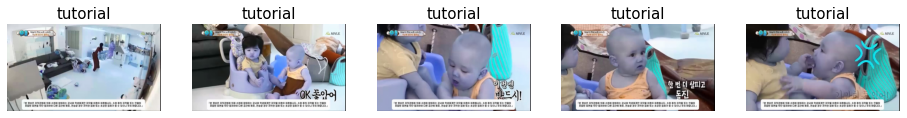

In [ ]:

img_list = glob.glob(IMAGE_PATH + "/*.jpg")
fig, axes = plt.subplots(1, 5,figsize=(16, 9))

for i in range(5):
  original_image = cv2.imread(img_list[i])
  rgb_image = cv2.cvtColor(original_image,cv2.COLOR_BGR2RGB)
  axes[i].imshow(original_image)
  axes[i].set_title("tutorial" , fontsize=15)    
  axes[i].axis('off')
  
plt.show()
